*Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set style
sns.set(style='whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Load and Inspect the Dataset

In [ ]:
def read_csv(filepath,filename):
  import os
  os.chdir(filepath)
  df = pd.read_excel(filename)

  return df

filepath = '/content/drive/MyDrive/tasmiya1'
filename = "startup_funding123.xlsx"

df = read_csv(filepath,filename)
#print(df.head(3))

In [ ]:
#Inspect first few rows
print("first  5 rows:")
print(df.head())

#basic info
print("\nDataset Info:")
print(df.info())

#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

first  5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Priva

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
# fill missing value
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Undisclosed')


In [ ]:
#Convert date column to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
#Apply the function to the Amount column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
# Save cleaned data
df.to_csv('cleaned_startup_funding.csv', index=False)

*Step 3: Funding trends over time

objective: Analyze how funding has evolved year-over-year and month-over-month

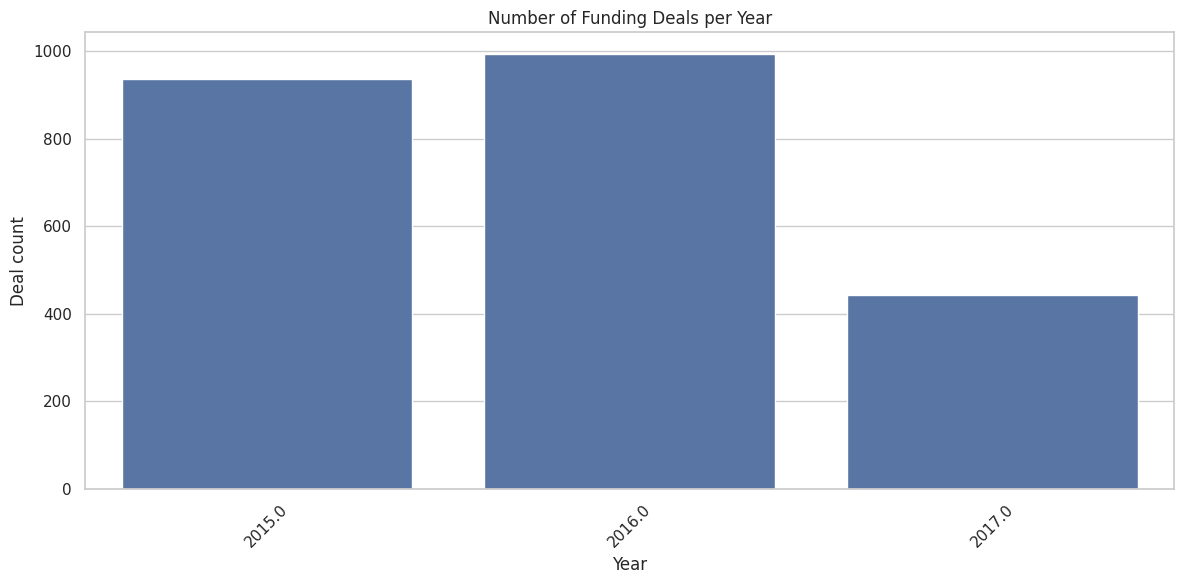

In [ ]:
#Number df deals per year
plt.figure(figsize=(12,6))
sns.countplot(x='Year',data=df)
plt.title('Number of Funding Deals per Year')
plt.xlabel('Year')
plt.ylabel('Deal count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

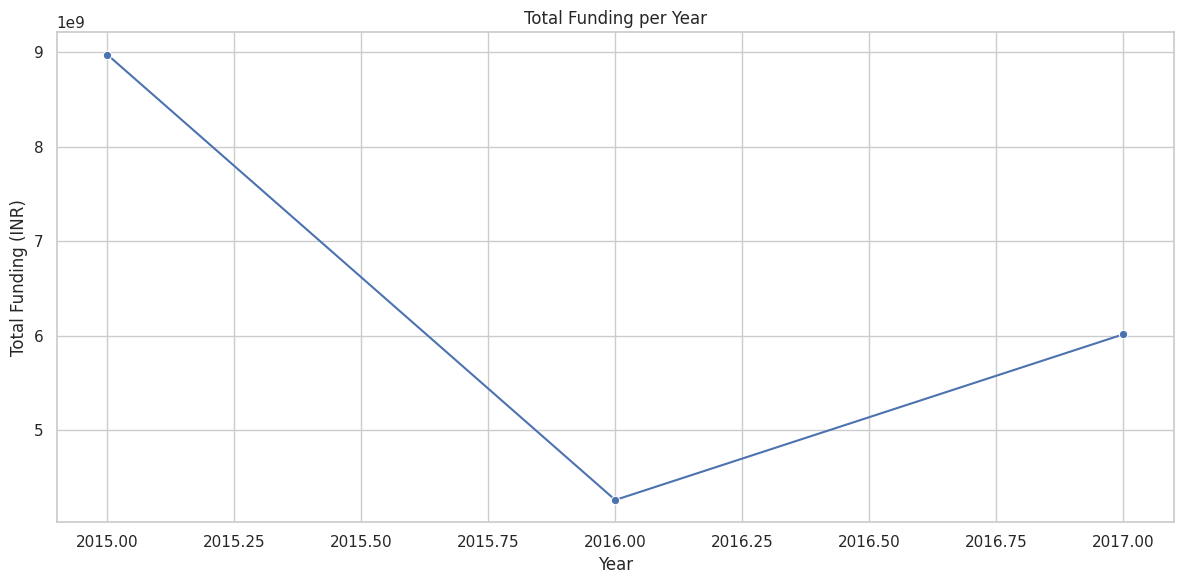

In [ ]:
# Total funding per year
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Amount_In_INR',data=yearly_funding, marker='o')
plt.title('Total Funding per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

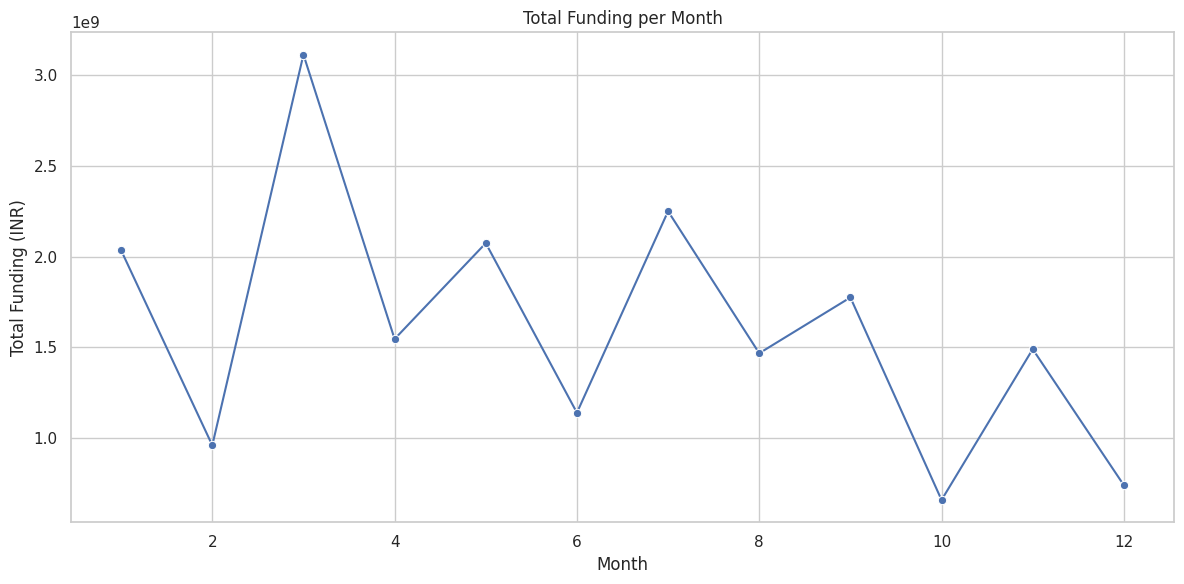

In [ ]:
# Total funding per month
monthly_funding = df.groupby('Month')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Amount_In_INR',data=monthly_funding, marker='o')
plt.title('Total Funding per Month')
plt.xlabel('Month')
plt.ylabel('Total Funding (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

*Step 4: Top funding sectors

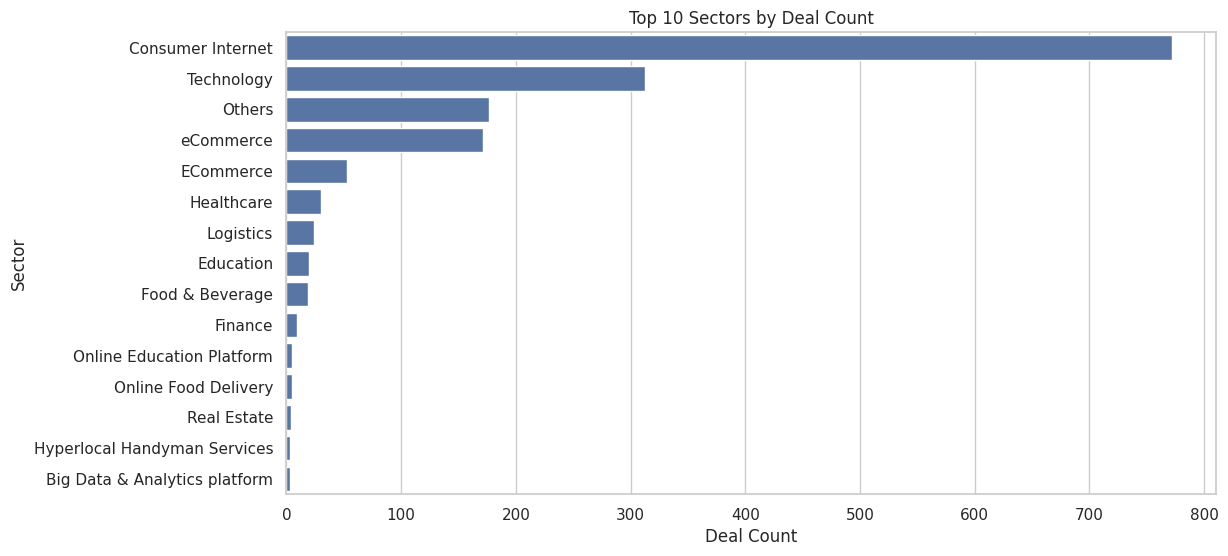

In [ ]:
#Top sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title('Top 10 Sectors by Deal Count')
plt.xlabel('Deal Count')
plt.ylabel('Sector')
plt.show()

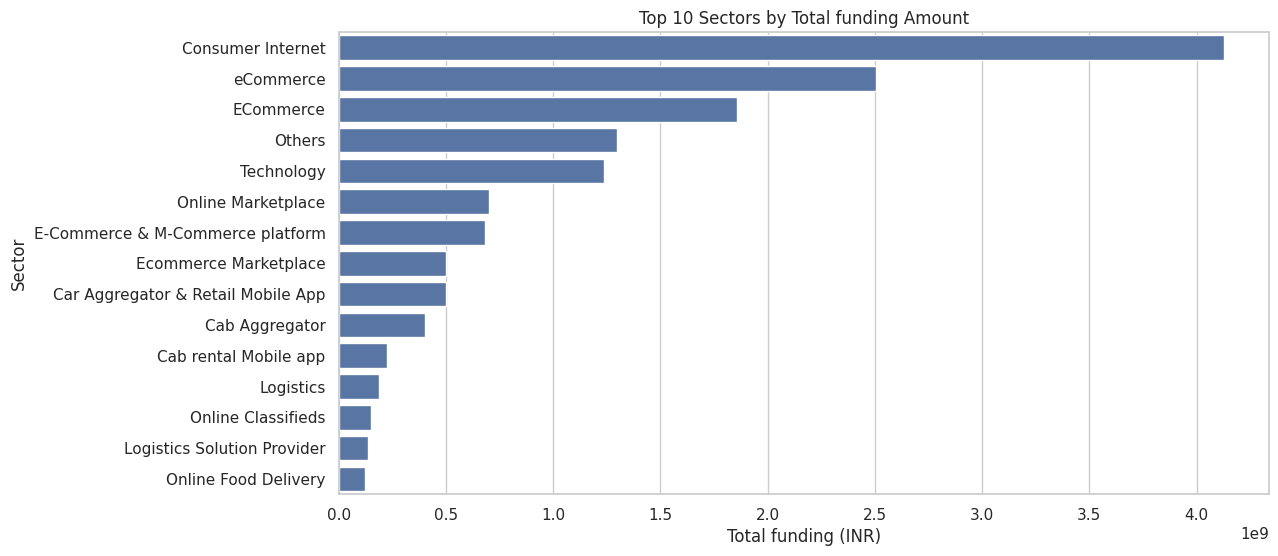

In [ ]:
#Top sectors by total funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace({'Ecommerce': 'eCommerce'})
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title('Top 10 Sectors by Total funding Amount')
plt.xlabel('Total funding (INR)')
plt.ylabel('Sector')
plt.show()

*Step 5: Investor Analyzes

Explanation:

Investors are split into individual name

Topinvestors are identified by number of deals and total funding.

In [ ]:
#split multiple investors and count
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
#investors_df

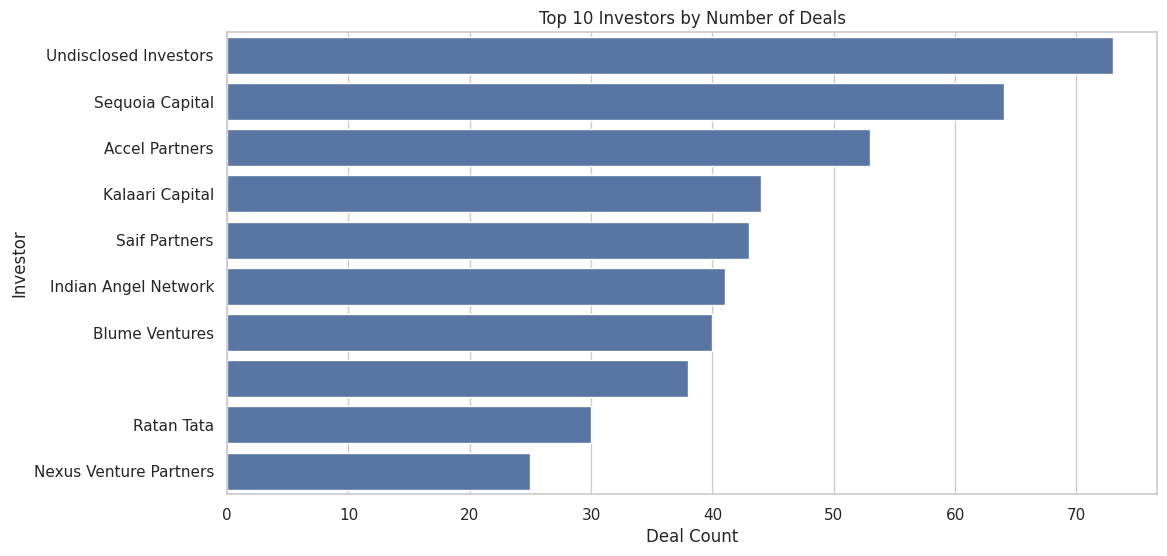

In [ ]:
# Top investors by number of deals
top_investors = investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_investors.values, y=top_investors.index)
plt.title('Top 10 Investors by Number of Deals')
plt.xlabel('Deal Count')
plt.ylabel('Investor')
plt.show()

*Step 6: Investment Type Analysis

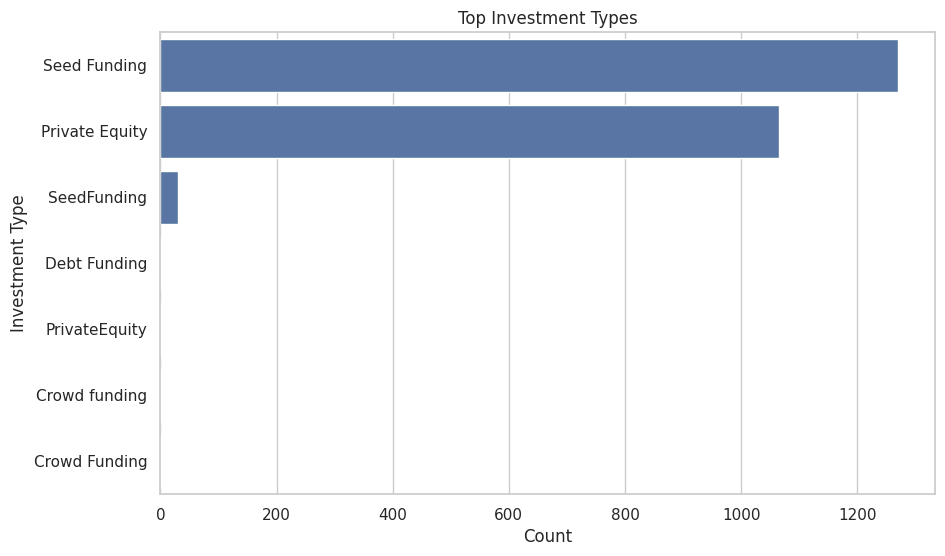

In [ ]:
investment_types = df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=investment_types.values, y=investment_types.index)
plt.title('Top Investment Types')
plt.xlabel('Count')
plt.ylabel('Investment Type')
plt.show()

C*Step 7:Correlation Between sector and investment type

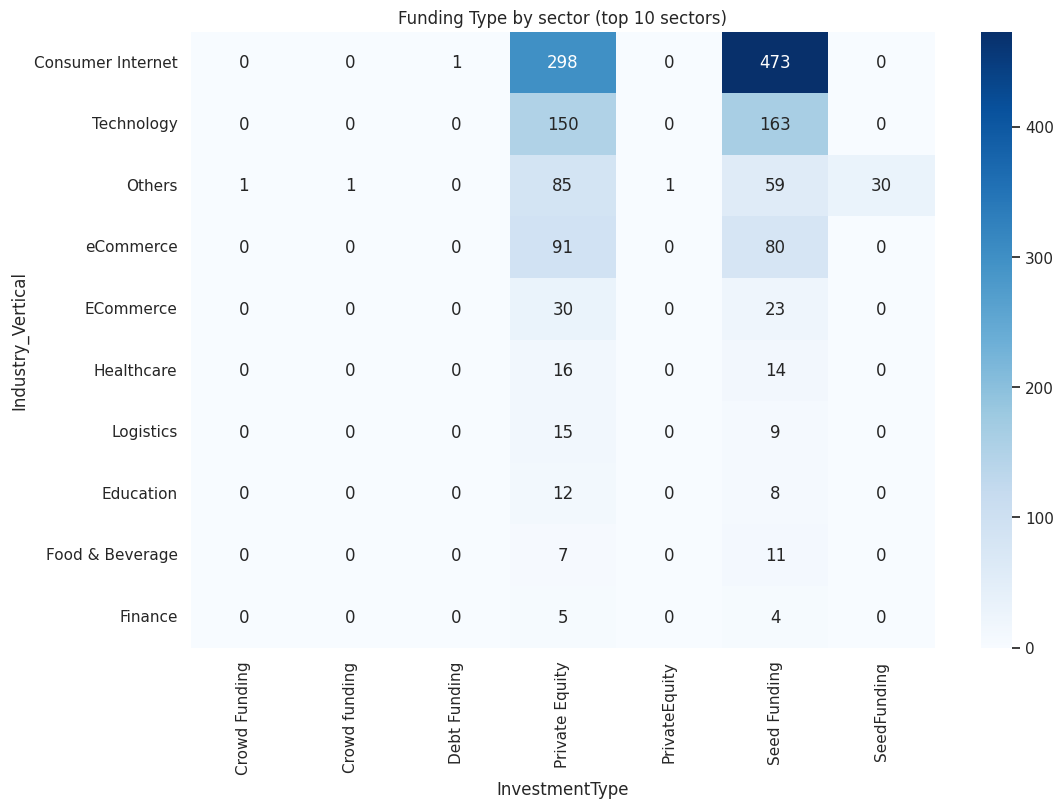

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(12,8))
sns.heatmap(sector_stage, annot=True, fmt="d", cmap="Blues")
plt.title("Funding Type by sector (top 10 sectors)")
plt.show()

*Step 8: Funding Distribution and Outlier

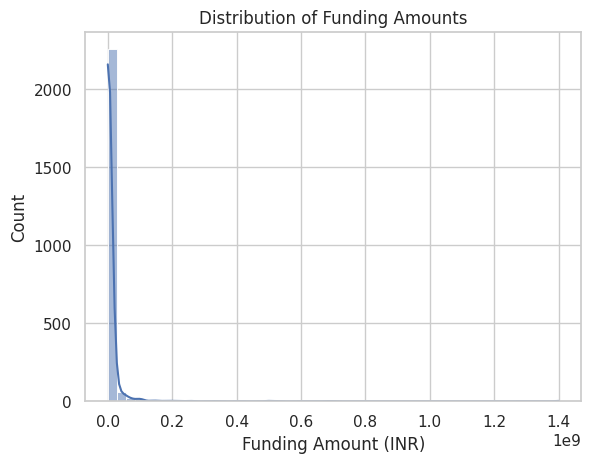

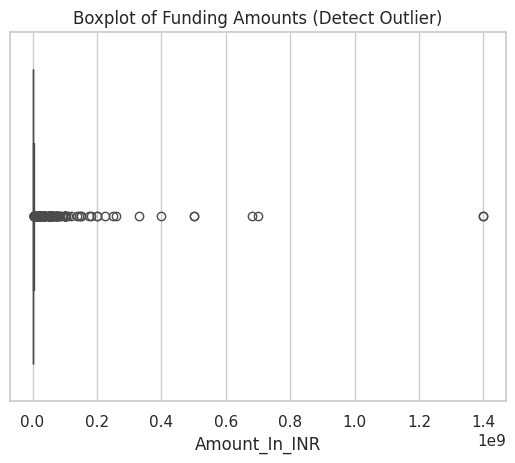

In [ ]:
sns.histplot(df['Amount_In_INR'],bins=50, kde=True)
plt.title("Distribution of Funding Amounts")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of Funding Amounts (Detect Outlier)")
plt.show()

*Step 9:Growth trend of top sectors

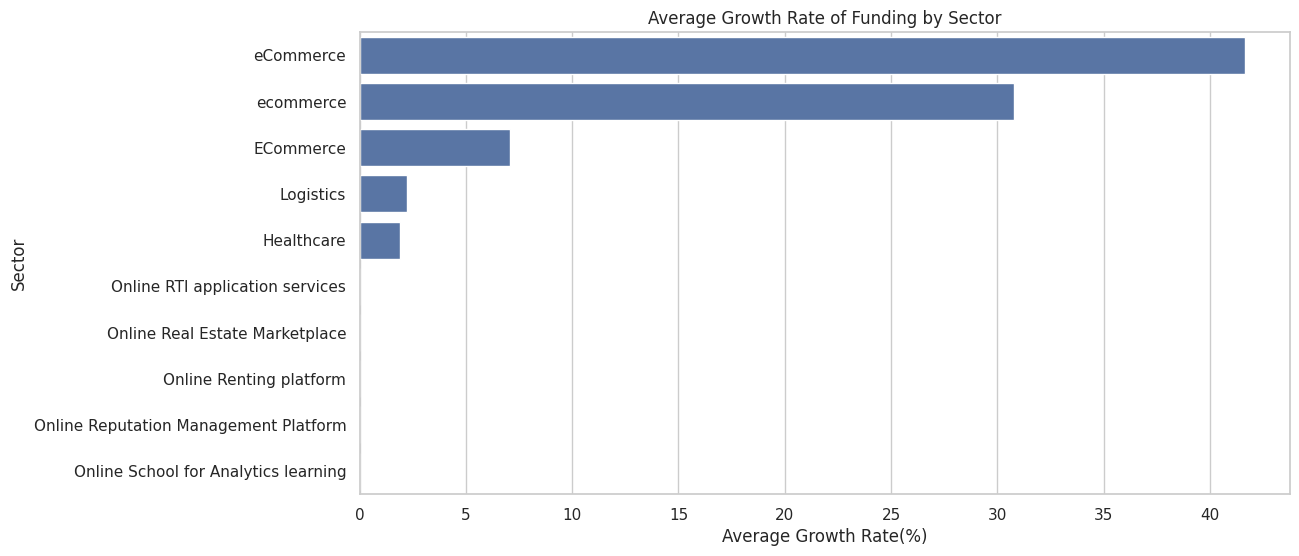

In [ ]:
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

sector_yearly = df.groupby(['Year', 'Industry_Vertical'])['Amount_In_INR'].sum().unstack()
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_growth.values, y=sector_growth.index)
plt.title('Average Growth Rate of Funding by Sector')
plt.xlabel('Average Growth Rate(%)')
plt.ylabel('Sector')
plt.show()

*Step 10: Advanced Analysis

In [ ]:
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investor(name):
    name = name.lower()
    if any(word in name for word in ['capital','ventures','partners','fund','vc','labs']):
      return 'VC'
    elif any(word in name for word in ['angel','network']):
      return 'Angel'
    elif any(word in name for word in ['crop','limited','pvt','ltd','lnc']):
      return 'Corporate'
    else:
       return 'Other'

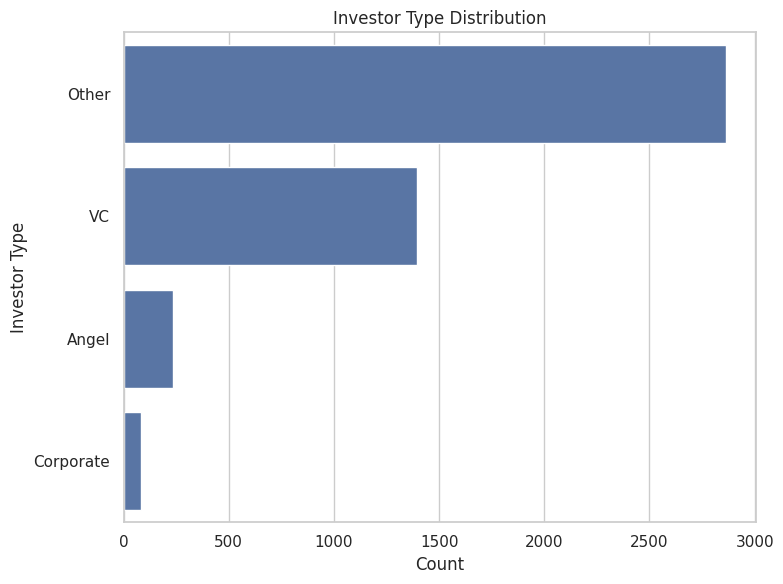

In [ ]:
investors_df['Investors-Type'] = investors_df['Investors_Name'].apply(classify_investor)
investors_type_counts = investors_df['Investors-Type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=investors_type_counts.values, y=investors_type_counts.index)
plt.title('Investor Type Distribution')
plt.xlabel('Count')
plt.ylabel('Investor Type')
plt.tight_layout()
plt.show()

2.Starting funding trajectory

Objective:track how top startups grew up in terms

3.Repeat investment Analysis

In [ ]:
investors_df = df[['StartupName','Investors_Name']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
#count how many times an investor in the startup
investor_startup_count = investors_df.groupby(['Investors_Name','StartupName']).size().reset_index(name='Dev')
repeat_investors = investor_startup_count[investor_startup_count['Dev'] > 1]

repeat_investors_summary = repeat_investors.groupby('Investors_Name')['Dev'].sum().sort_values(ascending=False).head(10)

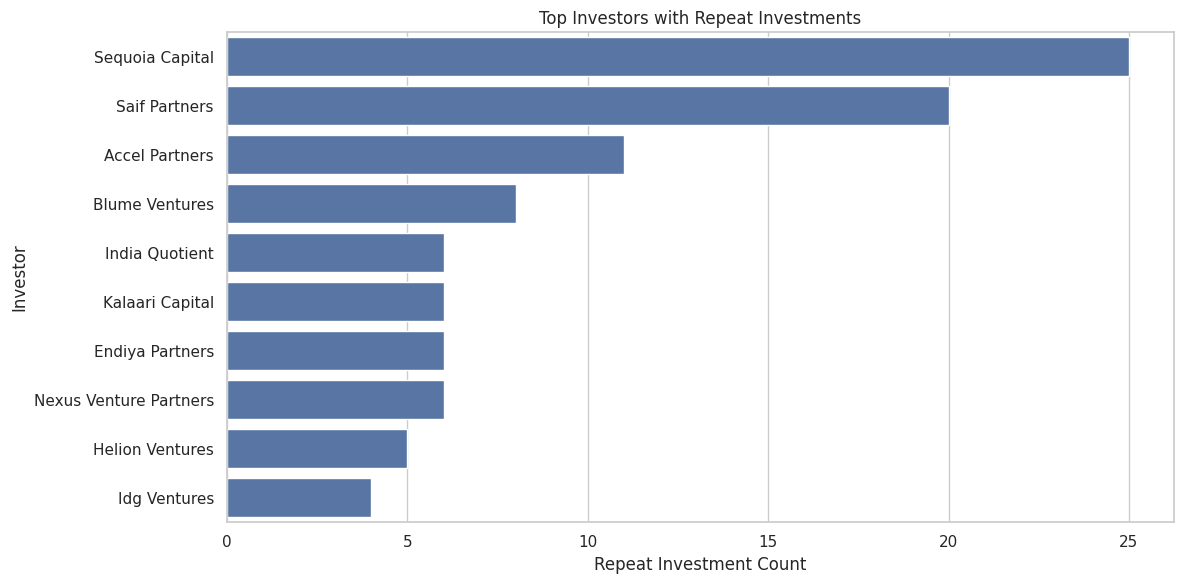

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repeat_investors_summary.values, y=repeat_investors_summary.index)
plt.title("Top Investors with Repeat Investments")
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

Funding Stage Analysis

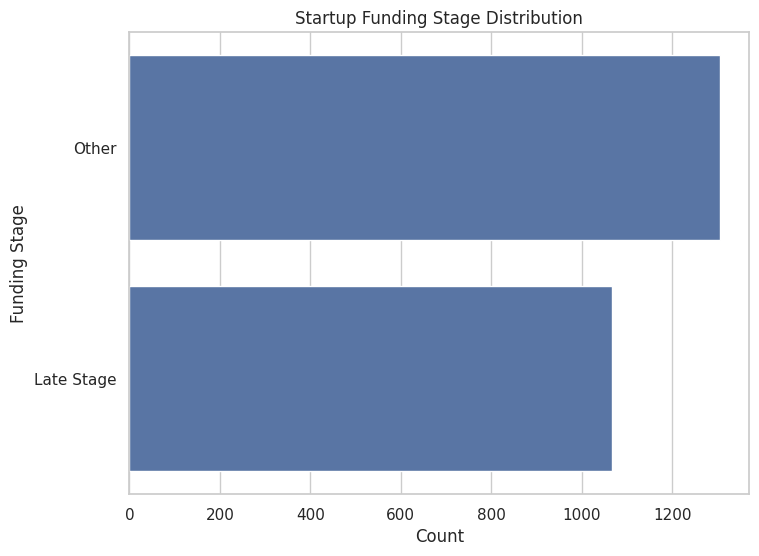

In [ ]:
#Define stage categories
early_stage = ['Seed','Pre-Seed','Angel']
late_stage = ['Series A','Series B','Series C','Series D','Series E','Private Equity','Venture Debt','Debt Funding']

df['Funding_Stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_Stage'].apply(lambda x: 'Early Stage' if x in early_stage else ('Late Stage' if x in late_stage else 'Other'))

#plot
plt.figure(figsize=(8,6))
sns.countplot(y='Funding_Stage', data=df, order=df['Funding_Stage'].value_counts().index)
plt.title("Startup Funding Stage Distribution")
plt.xlabel("Count")
plt.ylabel("Funding Stage")
plt.show()

funding type and investment type sectors

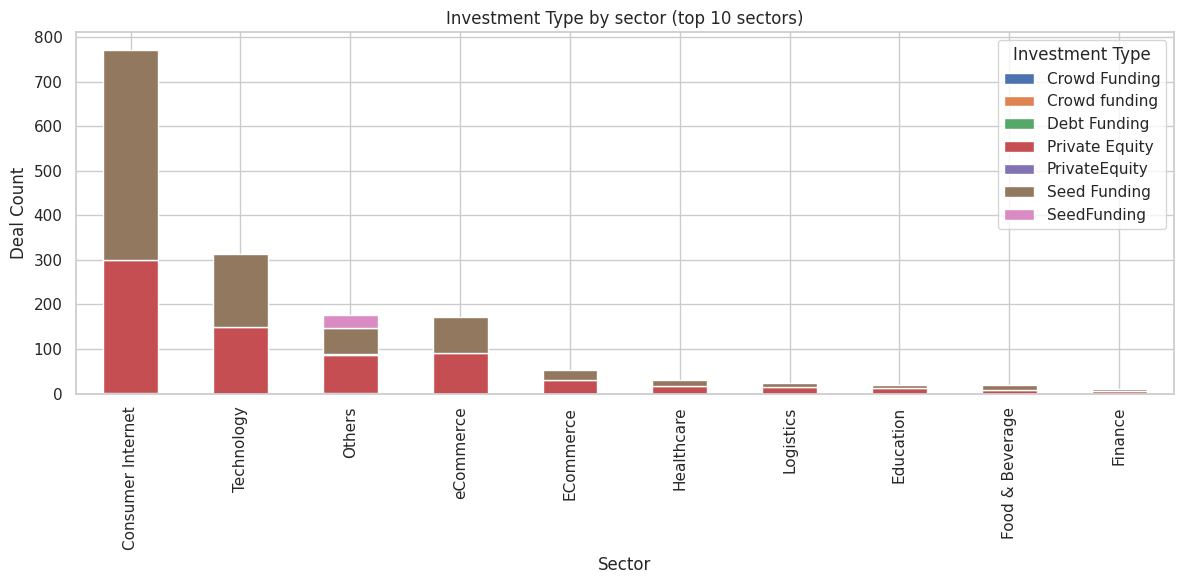

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar',stacked=True, figsize=(12,6))
plt.title("Investment Type by sector (top 10 sectors)")
plt.xlabel("Sector")
plt.ylabel("Deal Count")
plt.legend(title="Investment Type")
plt.tight_layout()
plt.show()